In [24]:
import numpy as np
import pandas as pd
%matplotlib inline

# Load specific forecasting tools
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

# Load datasets
df = pd.read_csv('India_dew.csv', index_col=0, parse_dates=True)
df.index.freq = 'D'
df.head()

,Cases,Dew Point
Date,,
2020-03-02,2,15.708333
2020-03-03,1,17.381944
2020-03-04,22,17.604167
2020-03-05,1,17.486111
2020-03-06,2,18.902778


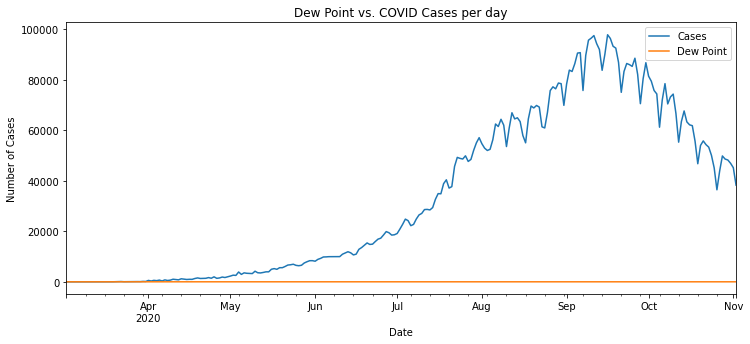

In [2]:
title = 'Dew Point vs. COVID Cases per day'
ylabel='Number of Cases'
xlabel=''

ax = df['Cases'].plot(figsize=(12,5),title=title,legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
df['Dew Point'].plot(legend=True);

In [3]:
def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [4]:
adf_test(df['Cases'],title='Cases')

Augmented Dickey-Fuller Test: Cases
ADF test statistic       -1.763322
p-value                   0.398817
# lags used              15.000000
# observations          230.000000
critical value (1%)      -3.459106
critical value (5%)      -2.874190
critical value (10%)     -2.573512
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [6]:
adf_test(df['Dew Point'], title='Dew')

Augmented Dickey-Fuller Test: Dew
ADF test statistic       -1.836852
p-value                   0.362325
# lags used               1.000000
# observations          244.000000
critical value (1%)      -3.457438
critical value (5%)      -2.873459
critical value (10%)     -2.573122
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [7]:
df_transformed = df.diff()

In [8]:
df_transformed = df_transformed.dropna()
adf_test(df_transformed['Cases'], title='CasesFirstDiff')
print()
adf_test(df_transformed['Dew Point'], title='DewFirstDiff')

Augmented Dickey-Fuller Test: CasesFirstDiff
ADF test statistic       -2.124834
p-value                   0.234647
# lags used              16.000000
# observations          228.000000
critical value (1%)      -3.459361
critical value (5%)      -2.874302
critical value (10%)     -2.573571
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary

Augmented Dickey-Fuller Test: DewFirstDiff
ADF test statistic     -1.216598e+01
p-value                 1.457032e-22
# lags used             1.000000e+00
# observations          2.430000e+02
critical value (1%)    -3.457551e+00
critical value (5%)    -2.873509e+00
critical value (10%)   -2.573148e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [9]:
df_transformed = df_transformed.diff().dropna()
adf_test(df_transformed['Cases'], title='CasesSecondDiff')
print()
adf_test(df_transformed['Dew Point'], title='DewSecondDiff')

Augmented Dickey-Fuller Test: CasesSecondDiff
ADF test statistic       -4.347048
p-value                   0.000368
# lags used              15.000000
# observations          228.000000
critical value (1%)      -3.459361
critical value (5%)      -2.874302
critical value (10%)     -2.573571
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary

Augmented Dickey-Fuller Test: DewSecondDiff
ADF test statistic     -7.650920e+00
p-value                 1.790293e-11
# lags used             1.500000e+01
# observations          2.280000e+02
critical value (1%)    -3.459361e+00
critical value (5%)    -2.874302e+00
critical value (10%)   -2.573571e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [10]:
nobs=7
train, test = df_transformed[0:-nobs], df_transformed[-nobs:]

In [12]:
from statsmodels.tsa.api import VAR
for i in range(31):
    model = VAR(train)
    results = model.fit(i)
    print('Order =', i)
    print('AIC: ', results.aic)
    print('BIC: ', results.bic)
    print()

Order = 0
AIC:  17.08129976404092
BIC:  17.11056609434586

Order = 1
AIC:  16.88396179636782
BIC:  16.972025316834575

Order = 2
AIC:  16.44198908205479
BIC:  16.58920548691199

Order = 3
AIC:  16.36887044590419
BIC:  16.57559905964354

Order = 4
AIC:  16.329687943183792
BIC:  16.59629177221462

Order = 5
AIC:  16.16263458265616
BIC:  16.489480367900377

Order = 6
AIC:  15.06982496152284
BIC:  15.45728323197118

Order = 7
AIC:  14.885936928743488
BIC:  15.334382055994341

Order = 8
AIC:  14.843094957567718
BIC:  15.352905211370532

Order = 9
AIC:  14.83137112545069
BIC:  15.40292873027643

Order = 10
AIC:  14.846323785158066
BIC:  15.480014977819824

Order = 11
AIC:  14.858010864673547
BIC:  15.554225953021003

Order = 12
AIC:  14.889177449302434
BIC:  15.648310872014527

Order = 13
AIC:  14.87254156695278
BIC:  15.694991954453547

Order = 14
AIC:  14.869270135620468
BIC:  15.755440372143728

Order = 15
AIC:  14.895684433966682
BIC:  15.845981720795876

Order = 16
AIC:  14.877634151120

In [13]:
results = model.fit(8)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 10, Nov, 2020
Time:                     08:36:53
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    15.3529
Nobs:                     229.000    HQIC:                   15.0488
Log likelihood:          -2315.41    FPE:                2.79584e+06
AIC:                      14.8431    Det(Omega_mle):     2.42277e+06
--------------------------------------------------------------------
Results for equation Cases
                  coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------
const              -68.798207       142.353083           -0.483           0.629
L1.Cases            -1.289726         0.067740          -19.039           0.000
L1.Dew Point        95.836029       198.729202            0.482 

In [14]:
lag_order = results.k_ar
lag_order

8

In [15]:
z = results.forecast(y=train.values[-lag_order:], steps=7)
z

array([[ 1.40994787e+04, -2.02841696e-01],
       [-2.49790922e+03, -2.35034627e-01],
       [-5.15247041e+03,  2.09571163e-01],
       [ 9.93398895e+02, -3.11075038e-01],
       [-1.88344758e+03,  3.74301284e-01],
       [-2.25880298e+03,  3.02476417e-03],
       [-1.31324134e+03, -4.76165118e-01]])

In [16]:
test

,Cases,Dew Point
Date,,
2020-10-27,16101.0,1.277778
2020-10-28,-1435.0,-2.159722
2020-10-29,-7221.0,-0.127315
2020-10-30,853.0,0.416666
2020-10-31,-925.0,1.256945
2020-11-01,-427.0,1.800926
2020-11-02,-5189.0,-3.083333


In [17]:
idx = pd.date_range('27/10/2020', periods=7, freq='D')
df_forecast = pd.DataFrame(z, index=idx, columns=['Cases2d','Dew2d'])
df_forecast

,Cases2d,Dew2d
2020-10-27,14099.478668,-0.202842
2020-10-28,-2497.909220,-0.235035
2020-10-29,-5152.470407,0.209571
2020-10-30,993.398895,-0.311075
2020-10-31,-1883.447577,0.374301
2020-11-01,-2258.802982,0.003025
2020-11-02,-1313.241338,-0.476165


In [18]:
# Add the most recent first difference from the training side of the original dataset to the forecast cumulative sum
df_forecast['Cases1d'] = (df['Cases'].iloc[-nobs-1]-df['Cases'].iloc[-nobs-2]) + df_forecast['Cases2d'].cumsum()

# Now build the forecast values from the first difference set
df_forecast['CasesForecast'] = df['Cases'].iloc[-nobs-1] + df_forecast['Cases1d'].cumsum()

In [19]:
# Add the most recent first difference from the training side of the original dataset to the forecast cumulative sum
df_forecast['Dew1d'] = (df['Dew Point'].iloc[-nobs-1]-df['Dew Point'].iloc[-nobs-2]) + df_forecast['Dew2d'].cumsum()

# Now build the forecast values from the first difference set
df_forecast['DewForecast'] = df['Dew Point'].iloc[-nobs-1] + df_forecast['Dew1d'].cumsum()

In [20]:
df_forecast

,Cases2d,Dew2d,Cases1d,CasesForecast,Dew1d,DewForecast
2020-10-27,14099.478668,-0.202842,5421.478668,41891.478668,-0.591731,16.790213
2020-10-28,-2497.909220,-0.235035,2923.569448,44815.048116,-0.826765,15.963448
2020-10-29,-5152.470407,0.209571,-2228.900959,42586.147157,-0.617194,15.346254
2020-10-30,993.398895,-0.311075,-1235.502065,41350.645092,-0.928269,14.417985
2020-10-31,-1883.447577,0.374301,-3118.949642,38231.695450,-0.553968,13.864017
2020-11-01,-2258.802982,0.003025,-5377.752623,32853.942827,-0.550943,13.313074
2020-11-02,-1313.241338,-0.476165,-6690.993961,26162.948865,-1.027108,12.285965


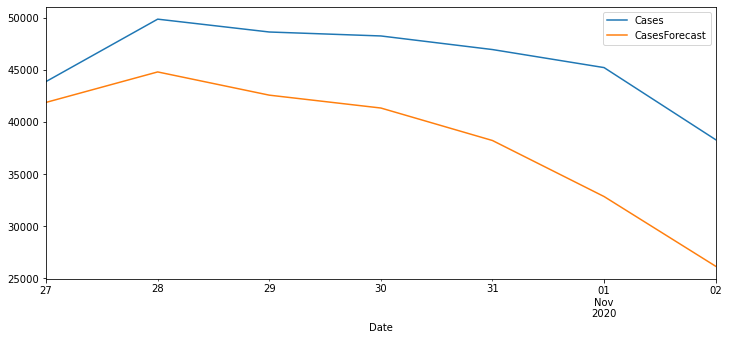

In [21]:
df['Cases'][-nobs:].plot(figsize=(12,5),legend=True).autoscale(axis='x',tight=True)
df_forecast['CasesForecast'].plot(legend=True);